In [55]:
import pandas as pd
import numpy as np
import seaborn as sns

In [56]:
df = pd.read_csv('Student_Performance.csv')

In [57]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [59]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [60]:
df.duplicated().sum()

127

In [61]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


In [62]:
df['Ext Curr'] = df['Extracurricular Activities'].replace({'Yes':1, 'No':0 })

C:\Users\mwojc\PycharmProjects\studentPerformance\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


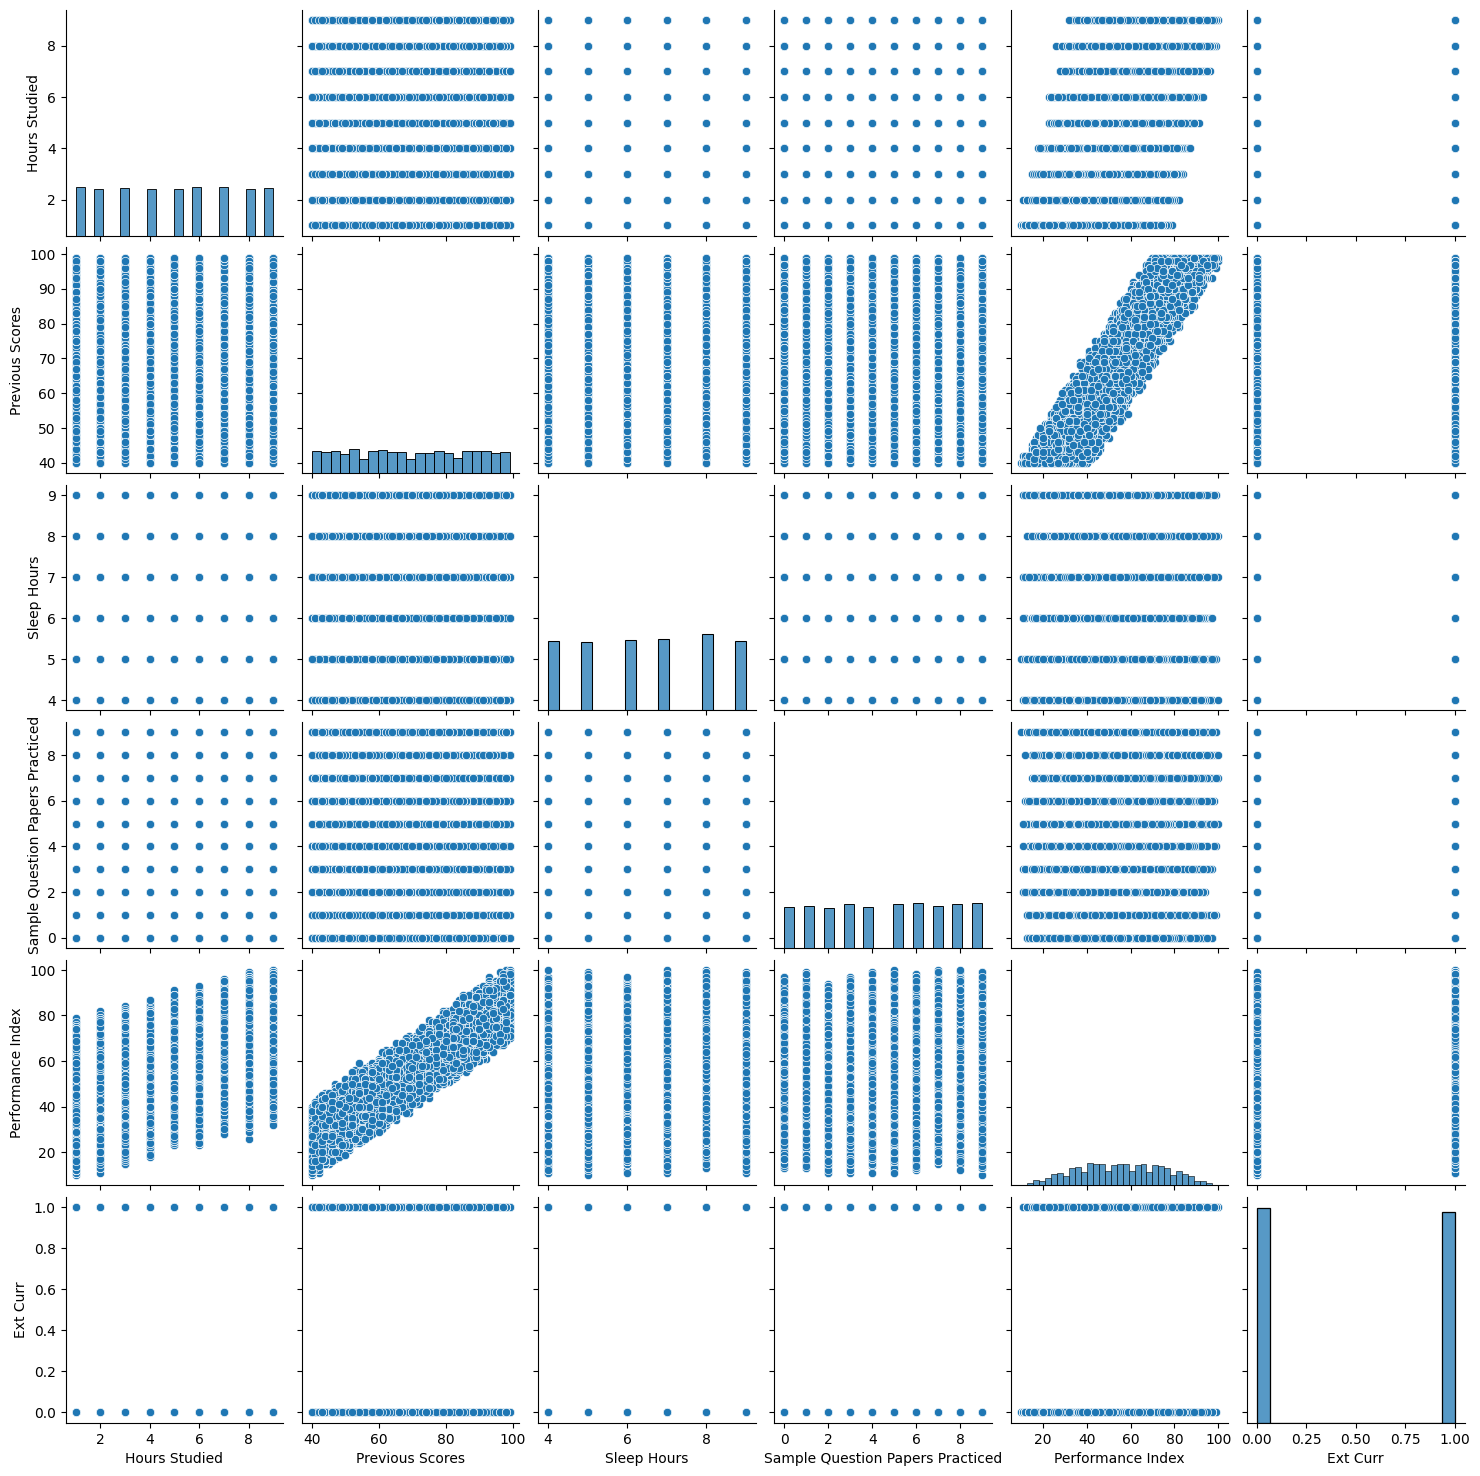

In [63]:
sns.pairplot(df)

In [64]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index',
       'Ext Curr'],
      dtype='object')

<Axes: xlabel='Hours Studied', ylabel='Previous Scores'>

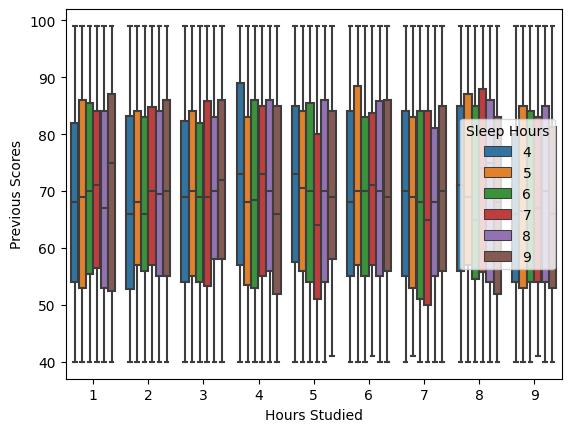

In [65]:
sns.boxplot(data=df, x='Hours Studied', y='Previous Scores', hue='Sleep Hours')

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Previous Scores'>

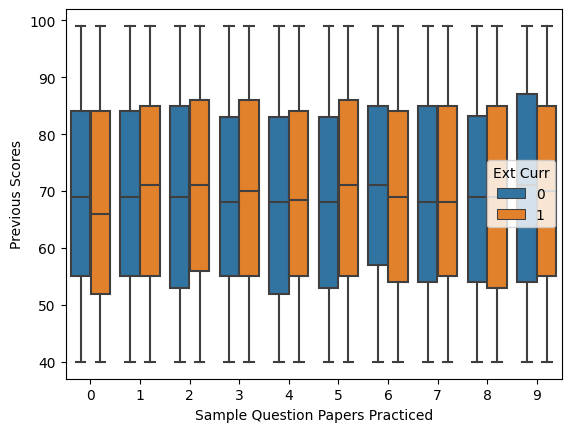

In [66]:
sns.boxplot(data=df, x='Sample Question Papers Practiced', y='Previous Scores', hue='Ext Curr')

## Hypothesis

### Students with more study hours will achieve better results
### Students with more Sample Question Papers Practice will achieve better results
### Students who engage in Ext Curr Act will achieve better results

## Building a model

In [67]:
df = df.drop(columns='Extracurricular Activities')
x = df.drop(columns=['Performance Index'])
y = df['Performance Index']

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [69]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [70]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2 = r2_score(y_test, y_pred)
df_results = df.copy()

In [72]:
df_results['Residual'] = y_pred - y_test

In [73]:
df_results = df_results.dropna(subset=['Residual'])

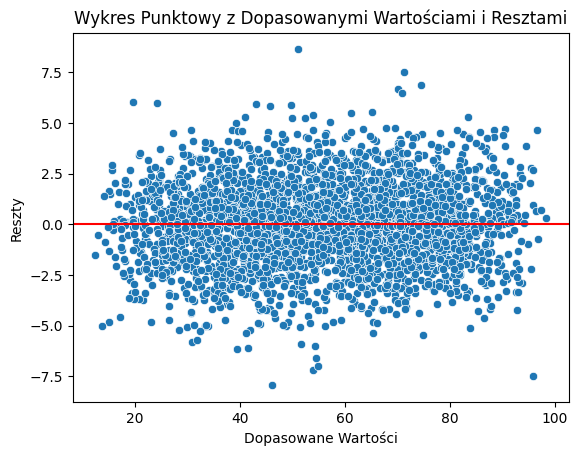

In [75]:
import matplotlib.pyplot as plt
fig = sns.scatterplot(x=model.predict(X_test), y=df_results['Residual'])
plt.axhline(y=0, color='r', linestyle='-')  # Linia zerowa dla reszt
plt.xlabel('Dopasowane Wartości')
plt.ylabel('Reszty')
plt.title('Wykres Punktowy z Dopasowanymi Wartościami i Resztami')
plt.show()